# XGBoost

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from fastbook import *
import matplotlib.pyplot as plt
import seaborn as sns
import os

# PATH = "/Users/luanagiusto/TP-1-ML"  # Cambia esto si tu path es diferente
PATH = "C:/Users/julia/ML_TP"

In [12]:
def fit_transform_xgb(X, y, cat_features=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb = XGBClassifier(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        eval_metric='auc',
        random_state=42,
        n_jobs=-1,
    )


    xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    proba = xgb.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, proba)
    return xgb, auc, proba

In [16]:
def plot_feature_importance_xgb(model, X, top_k=20):
    imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    top = imp.head(top_k)[::-1]

    plt.figure(figsize=(8, max(4, top_k * 0.4)))
    top.plot(kind="barh")
    plt.title(f"Importancia de Features (XGBoost) - Top {top_k}")
    plt.xlabel("Importancia relativa")
    plt.tight_layout()
    plt.show()

    return imp

In [14]:
# Cargar datos
df = pd.read_parquet(os.path.join(PATH, 'prework_output.parquet'))

# Separar features y target
xs = df.drop(columns='target')
y = df['target']

# Entrenar y evaluar
xgb, auc, _ = fit_transform_xgb(xs, y)
print(f"ROC-AUC (validación): {auc:.6f}")

ROC-AUC (validación): 0.775341


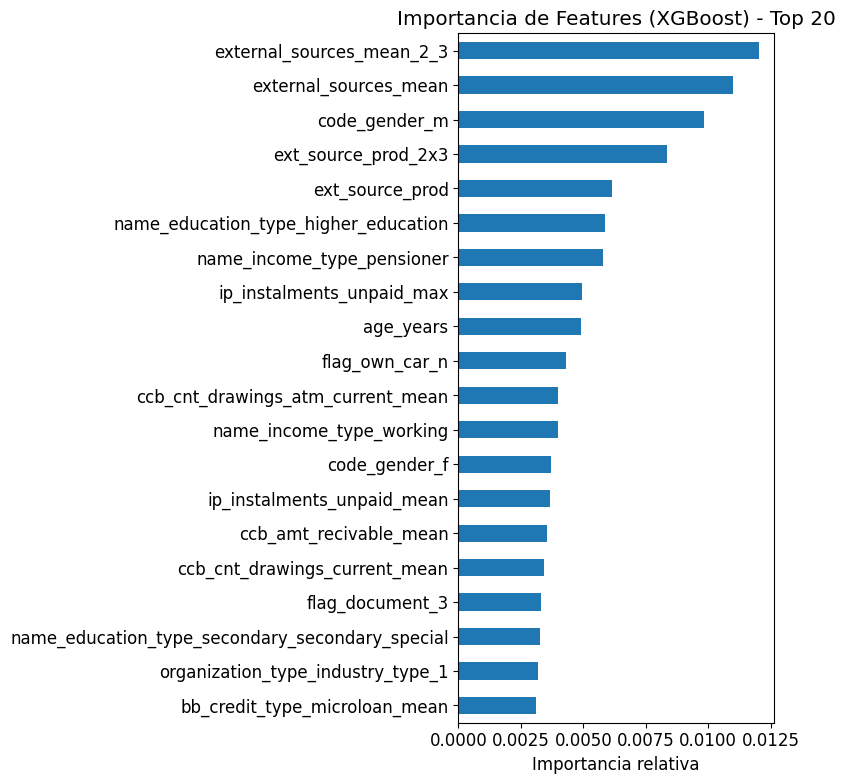

In [17]:
# Calcular y graficar importancias de features
imp = plot_feature_importance_xgb(xgb, xs, top_k=20)